## Importing the libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
# from sklearn.model_selection import train_test_split
import seaborn as sns

## Importing and preparing the dataset

In [3]:
# Change location code to the location required to train on for LSTM time series weather forecasting
location_code = "kuala-lumpur"
hourly_dataframe = pd.read_csv(f'../../datasets/{location_code}/weather_data_hourly.csv')

In [15]:
hourly_dataframe.head()

,date,temperature_2m,relative_humidity_2m,dew_point_2m,rain,pressure_msl,wind_speed_10m,wind_direction_10m
0,2010-01-01 00:00:00+00:00,23.257000,98.20215,22.957000,0.0,1008.6,4.213692,109.98319
1,2010-01-01 01:00:00+00:00,24.607000,94.45848,23.657000,0.0,1009.3,3.600000,143.13002
2,2010-01-01 02:00:00+00:00,25.457000,89.25246,23.557001,0.0,1010.0,5.154415,155.22488
3,2010-01-01 03:00:00+00:00,26.357000,82.10335,23.057001,0.0,1010.2,4.680000,157.38010
4,2010-01-01 04:00:00+00:00,26.807001,80.19705,23.107000,0.2,1009.9,3.545589,156.03750


In [14]:
hourly_dataframe.columns

Index(['date', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'rain', 'pressure_msl', 'wind_speed_10m', 'wind_direction_10m'],
      dtype='object')

In [12]:
# Train Test split of 70-10-20 (train-eval-test) for LSTM training
training_size = int(0.70 * hourly_dataframe.shape[0])  
evaluation_size = int(0.10 * hourly_dataframe.shape[0])
testing_size = hourly_dataframe.shape[0] - training_size - evaluation_size

print("Training Size: ", training_size)
print("Evaluation Size: ", evaluation_size)
print("Testing Size: ", testing_size)
print("Total Size: ", hourly_dataframe.shape[0])

Training Size:  89476
Evaluation Size:  12782
Testing Size:  25566
Total Size:  127824


## Feature Selection Using Correlation Analysis

(95868, 8)


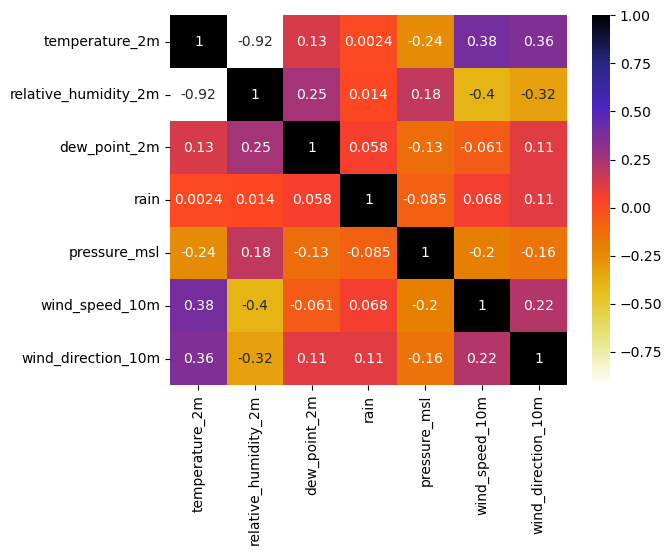

In [9]:
cor = hourly_dataframe.iloc[:training_size].drop(columns=['date']).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

## Splitting the dataset into the Training set and Test set

In [ ]:
hourly_dataframe = hourly_dataframe.drop(columns=['date'])

In [1]:
# Splitting and preparing the train and test dataframes

# Function to convert data into sequences
def make_sequence(data, label_col, window_size =  72):

    sequences = []
    labels = []

    for i in range(data.shape[0] - window_size):
        sequences.append(data[i:i+window_size])
        labels.append(data.iloc[i+window_size][label_col])
        
    return sequences, labels

In [ ]:
sequences, labels = make_sequence(hourly_dataframe.iloc[:78, :], 'temperature')

In [ ]:
X_train, y_train = make_sequence(hourly_dataframe.iloc[:training_size], 'temperature')
X_eval, y_eval = make_sequence(hourly_dataframe.iloc[training_size:training_size+evaluation_size], 'temperature')
X_test, y_test = make_sequence(hourly_dataframe.iloc[training_size+evaluation_size:], 'temperature')

Text(0, 0.5, 'Value')

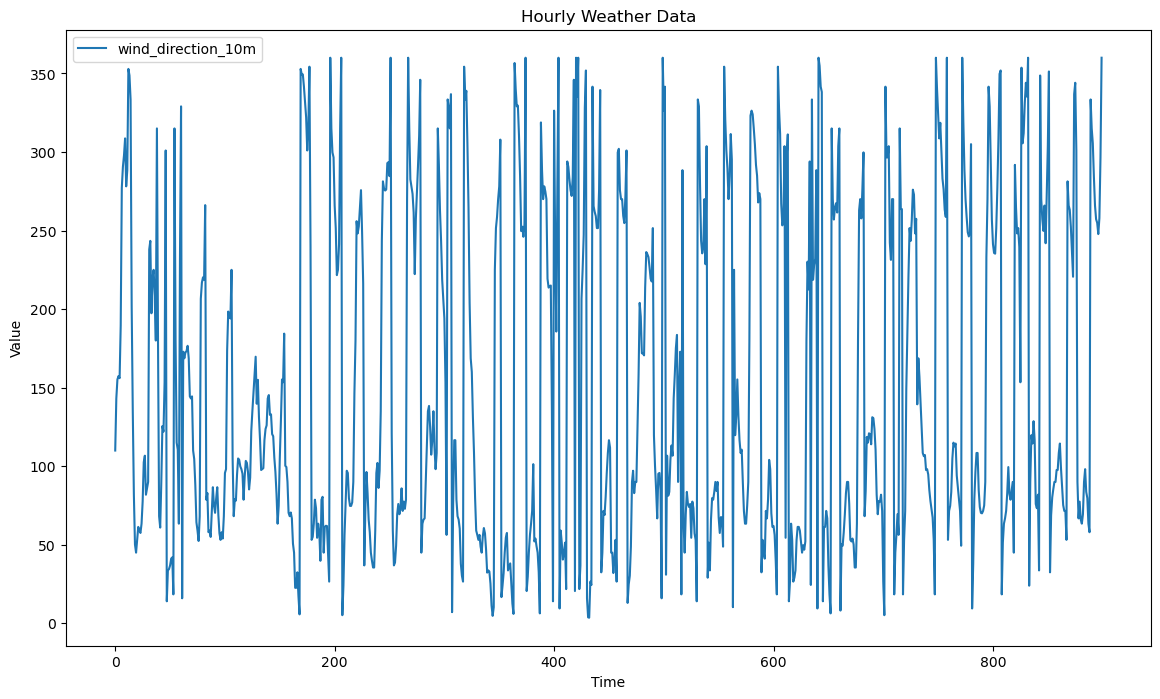

In [17]:
# Temperature dependent variable: Drop rain based on correlation matrix

hourly_dataframe[['date', 'wind_direction_10m']].head(900).plot(kind='line', figsize=(14, 8))
plt.title('Hourly Weather Data')
plt.xlabel('Time')
plt.ylabel('Value')